In [1]:
dic1 = open('./dict/positive-words.txt')
dic2 = open('./dict/negative-words.txt')
positive_words=[]
negative_words=[]
for line in dic1:
    positive_words.append(line.strip('\n'))
for line in dic2:
    negative_words.append(line.strip('\n'))

In [2]:
positive_words[0:10]

['a+',
 'abound',
 'abounds',
 'abundance',
 'abundant',
 'accessable',
 'accessible',
 'acclaim',
 'acclaimed',
 'acclamation']

In [3]:
negative_words[0:10]

[';;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;;',
 '; ',
 '2-faced',
 '2-faces',
 'abnormal',
 'abolish',
 'abominable',
 'abominably',
 'abominate',
 'abomination']

In [6]:
import pandas as pd
df = pd.read_csv('./data/CEO3.csv', encoding='latin')
df[0:10]

,number,firm,publishing,country,text,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Unnamed: 9,...,Unnamed: 450,Unnamed: 451,Unnamed: 452,Unnamed: 453,Unnamed: 454,Unnamed: 455,Unnamed: 456,Unnamed: 457,Unnamed: 458,Unnamed: 459
0,2,Amorepacific,1,Korea,We will use beauty to change the world and bec...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,4,Amorepacific,3,Korea,AMOREPACIFC Group will endeavor to become a gr...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,502,Amorepacific,4,Korea,AMOREPACIFIC Group has been pursuing the path ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,Asiana Airlines,1,Korea,This year marks the 25th anniversary of the es...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6,Asiana Airlines,2,Korea,"Since the inception, Asiana Airlines has pledg...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,7,Asiana Airlines,3,Korea,All of us will do our best without stopping fo...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,503,Asiana Airlines,4,Korea,"First of all, I would like to express my heart...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,11,BNK Financial Group Inc.,3,Korea,Since the establishment of Busan Bank in 1967 ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,504,BNK Financial Group Inc.,4,Korea,"In March 2011, BNK Financial Group was launche...",NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,12,BPA,3,Korea,I am pleased to introduce various sustainable ...,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [7]:
firm = df.get('firm')
text = df.get('text')

company = {firm[0]:text[0]}
for i in range(len(firm)):
    if company.get(firm[i]) != None:
        company[firm[i]] = company.get(firm[i]) + "\n" + text[i]
    else:
        company[firm[i]] = text[i]

company.get('Amorepacific')

'We will use beauty to change the world and become a company that customers love. To our stakeholders, During the past 67 years, AMOREPACIFIC has embarked on a long journey of beauty to provide happiness and pleasure to people all around the world with AMOREPACIFIC¡¯s creation of beauty products. We have stood the test of numerous crises resulting from uncertain management conditions to achieve continuous growth by caring about our customers and taking quick actions to seek new opportunities. Even at this very moment, AMOREPACIFIC is striving to satisfy global customers by discovering the values of sustainable beauty found in Asia¡¯s profound wisdom, while also making concerted efforts to create a sustainable company. AMOREPACIFIC has minimized the negative impacts on the environment and strengthened the development of sustainable products and packaging materials to deliver the values of environment-friendly consumption to customers. We continually expanded the Beautiful Fair Trade to 

In [8]:
from nltk.corpus import gutenberg
from nltk.tokenize import sent_tokenize
from nltk.tokenize import word_tokenize

In [9]:
import nltk
nltk.download('punkt')
tokens=[]
for f, t in company.items():
    token=word_tokenize(t)
    tokens.append([f,token])

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\HTS\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.


In [10]:
sentiment_firm=[]

for token in tokens:
    firm=token[0]
    sentiment=0
    count=0
    
    for t in token[1]:
        if t in positive_words:
            sentiment+=1
            count+=1
        elif t in negative_words:
            sentiment -=1
            count+=1
    
    sentiment_firm.append([firm,sentiment/count])

sentiment_firm[0:10]

[['Amorepacific', 0.8666666666666667],
 ['Asiana Airlines', 0.768595041322314],
 ['BNK Financial Group Inc.', 0.9344262295081968],
 ['BPA', 0.8823529411764706],
 ['BS FINANCIAL GROUP INC', 0.68],
 ['CJ', 0.5555555555555556],
 ['Coway', 0.8125],
 ['Daelim', 0.75],
 ['Daewoo E&C', 0.4533333333333333],
 ['Daum Communications', 0.5652173913043478]]

In [11]:
import numpy as np
import matplotlib.pyplot as plt

a=[]
for firm in sentiment_firm:
    a.append(firm[1]*100)
X=np.arange(len(a))

plt.title("sentiment(%)",fontsize=20)
plt.bar(X,a)
plt.show()

<Figure size 640x480 with 1 Axes>

In [12]:
!pip install py_lex

You are using pip version 19.0.3, however version 19.1.1 is available.
You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [13]:
from py_lex import Liwc, EmoLex
import pandas as pd
emotion_dic=pd.read_excel('./dict/NRC-Emotion-Lexicon-v0.92-In105Languages-Nov2017Translations_ENG.xlsx')
emotion_dic[0:10]

,English (en),Positive,Negative,Anger,Anticipation,Disgust,Fear,Joy,Sadness,Surprise,Trust
0,aback,0,0,0,0,0,0,0,0,0,0
1,abacus,0,0,0,0,0,0,0,0,0,1
2,abandon,0,1,0,0,0,1,0,1,0,0
3,abandoned,0,1,1,0,0,1,0,1,0,0
4,abandonment,0,1,1,0,0,1,0,1,1,0
5,abate,0,0,0,0,0,0,0,0,0,0
6,abatement,0,0,0,0,0,0,0,0,0,0
7,abba,1,0,0,0,0,0,0,0,0,0
8,abbot,0,0,0,0,0,0,0,0,0,1
9,abbreviate,0,0,0,0,0,0,0,0,0,0


In [14]:
df=emotion_dic.set_index('English (en)')

In [15]:
import matplotlib.pyplot as plt
import numpy as np

emotion_firm=[]

for token in tokens:
    firm=token[0]
    sentiment=0
    count=0
    arr=[]
    senti_count=0
    for t in token[1]:
        if t in df.index:
            count+=1
            arr.append(list(df.loc[t]))
            if np.sum(list(df.loc[t]))!=0:
                senti_count+=1
    emotion_firm.append([firm,np.sum(arr,axis=0),senti_count/count])

emotion_firm[0:10]

[['Amorepacific',
  array([218,  16,   6,  57,   4,  20,  97,   6,  14,  82]),
  0.4088050314465409],
 ['Asiana Airlines',
  array([147,  14,   9,  49,   5,  15,  41,   4,  17,  89]),
  0.41237113402061853],
 ['BNK Financial Group Inc.',
  array([96,  6,  2, 19,  2,  1, 20,  3,  2, 51]),
  0.43636363636363634],
 ['BPA', array([47,  6,  1, 12,  2,  2,  8,  2,  2, 24]), 0.34523809523809523],
 ['BS FINANCIAL GROUP INC',
  array([77,  6,  0, 19,  0,  3, 21,  3,  3, 40]),
  0.38],
 ['CJ', array([39,  9,  0,  6,  1,  4, 13,  3,  2, 25]), 0.4435483870967742],
 ['Coway',
  array([39,  1,  1, 17,  0,  1, 18,  1,  0, 23]),
  0.37606837606837606],
 ['Daelim',
  array([71, 14,  4, 12,  4, 13, 18,  8,  4, 29]),
  0.45918367346938777],
 ['Daewoo E&C',
  array([181,  46,   9,  50,  11,  14,  33,  15,  16,  96]),
  0.48727272727272725],
 ['Daum Communications',
  array([36,  7,  2, 24,  1,  3,  9,  1,  1, 15]),
  0.4645669291338583]]

In [16]:
emotion_result=[]
for firm in emotion_firm:
    emotion_result.append({"Firm" : firm[0],
                           "Positive": str("%0.2f"%( firm[1][0]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Negative" : str("%0.2f"%( firm[1][1]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Anger" : str("%0.2f"%( firm[1][2]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Anticipation" : str("%0.2f"%( firm[1][3]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Disgust" : str("%0.2f"%( firm[1][4]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Fear" : str("%0.2f"%( firm[1][5]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Joy" : str("%0.2f"%( firm[1][6]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Sadness" : str("%0.2f"%( firm[1][7]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Surprise" : str("%0.2f"%( firm[1][8]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Trust" : str("%0.2f"%( firm[1][9]/(firm[1][0]+firm[1][1])*100 ))+"%",
                            "Sentiwords / non-sentiwords (%)":str("%0.2f"%(firm[2]*100))+"%"}
                          )
emotion_result[0:10]

[{'Firm': 'Amorepacific',
  'Positive': '93.16%',
  'Negative': '6.84%',
  'Anger': '2.56%',
  'Anticipation': '24.36%',
  'Disgust': '1.71%',
  'Fear': '8.55%',
  'Joy': '41.45%',
  'Sadness': '2.56%',
  'Surprise': '5.98%',
  'Trust': '35.04%',
  'Sentiwords / non-sentiwords (%)': '40.88%'},
 {'Firm': 'Asiana Airlines',
  'Positive': '91.30%',
  'Negative': '8.70%',
  'Anger': '5.59%',
  'Anticipation': '30.43%',
  'Disgust': '3.11%',
  'Fear': '9.32%',
  'Joy': '25.47%',
  'Sadness': '2.48%',
  'Surprise': '10.56%',
  'Trust': '55.28%',
  'Sentiwords / non-sentiwords (%)': '41.24%'},
 {'Firm': 'BNK Financial Group Inc.',
  'Positive': '94.12%',
  'Negative': '5.88%',
  'Anger': '1.96%',
  'Anticipation': '18.63%',
  'Disgust': '1.96%',
  'Fear': '0.98%',
  'Joy': '19.61%',
  'Sadness': '2.94%',
  'Surprise': '1.96%',
  'Trust': '50.00%',
  'Sentiwords / non-sentiwords (%)': '43.64%'},
 {'Firm': 'BPA',
  'Positive': '88.68%',
  'Negative': '11.32%',
  'Anger': '1.89%',
  'Anticipatio

In [17]:
y=[]
for firm in emotion_firm:
    y.append(list(firm[1][2:]))
x=['Positive','Negative','Anger','Anticipation','Disgust','Fear','Joy','Sadness','Suprise','Trust']
z=[]
for firm in emotion_firm:
    z.append(firm[0])

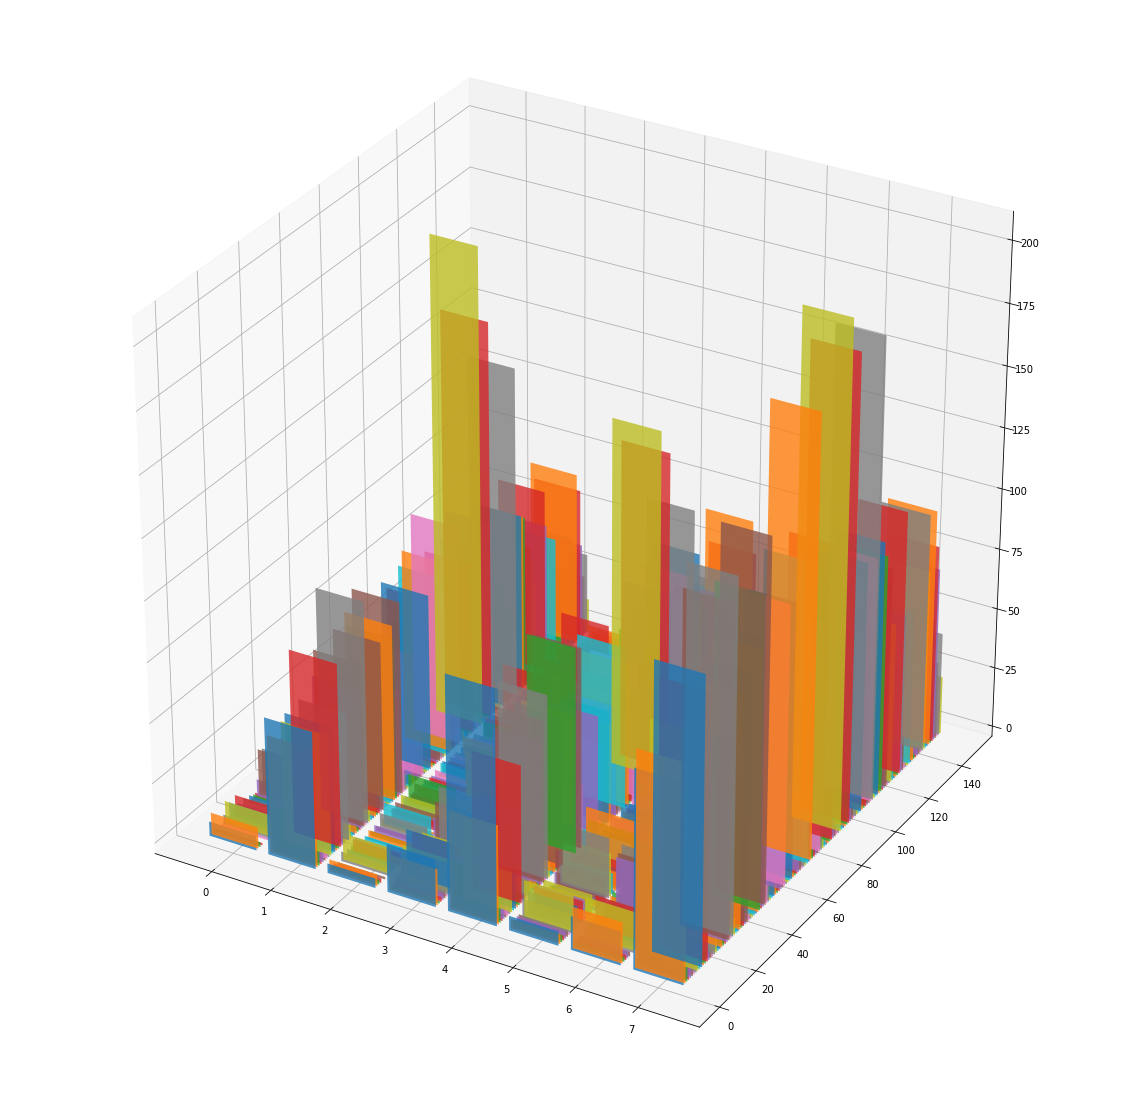

In [18]:
from mpl_toolkits.mplot3d import Axes3D

fig=plt.figure()
fig.set_size_inches(20, 20, 20)

ax = fig.add_subplot(111,projection='3d')
for firm in emotion_firm:
    xs=np.arange(8)

    ys=firm[1][2:]
    zs=emotion_firm.index(firm)
    ax.bar(xs,ys,zs,zdir='y',alpha=0.8)

plt.show()

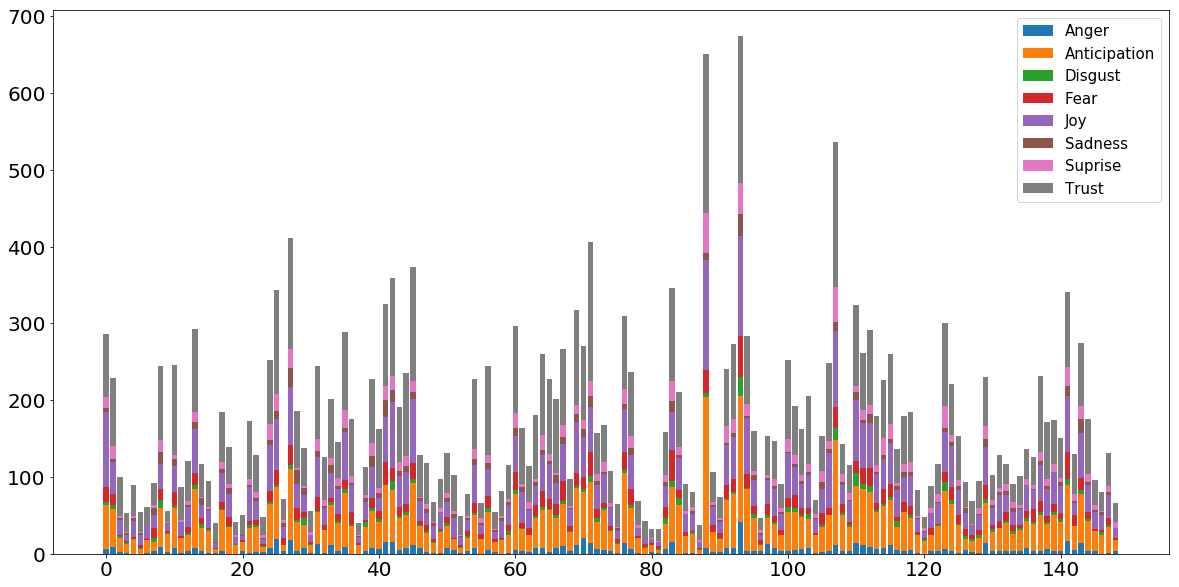

In [19]:
E=[]
plt.rcParams["figure.figsize"]=(20,10)
plt.rcParams["ytick.labelsize"]=20
plt.rcParams["xtick.labelsize"]=20
plt.rcParams["legend.fontsize"]=15

for firm in emotion_firm:
    E.append(firm[1][2:])
a=np.transpose(E)
X=np.arange(len(a[0]))
plt.bar(X,a[0],label='Anger')
plt.bar(X,a[1],bottom=a[0],label='Anticipation')
plt.bar(X,a[2],bottom=sum(a[0:2]),label='Disgust')
plt.bar(X,a[3],bottom=sum(a[0:3]),label='Fear')
plt.bar(X,a[4],bottom=sum(a[0:4]),label='Joy')
plt.bar(X,a[5],bottom=sum(a[0:5]),label='Sadness')
plt.bar(X,a[6],bottom=sum(a[0:6]),label='Suprise')
plt.bar(X,a[7],bottom=sum(a[0:7]),label='Trust')

plt.xlabel="Firm index"
plt.legend()
plt.show()